## 📍 Basic 3d density chart


Let's start by making a basic 3d density chart. This step is described in its own blogpost [here](https://python-graph-gallery.com/371-surface-plot), so let's just remember how the code looks like:


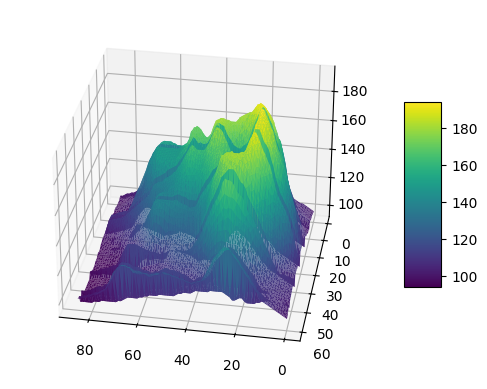

In [1]:
# Import necessary libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Get the data (csv file is hosted on the web)
url = 'https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/volcano.csv'
data = pd.read_csv(url)

# Transform it to a long format
df = data.unstack().reset_index()
df.columns = ["X", "Y", "Z"]

# Transform the old column name in something numeric
df['X'] = pd.Categorical(df['X'])
df['X'] = df['X'].cat.codes

# Create the plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Plot the data
trisurf = ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.2)

# Set the angle of the camera
ax.view_init(30, 100)

# Add color bar which maps values to colors
fig.colorbar(trisurf, ax=ax, shrink=0.5, aspect=5)

# Show the plot
plt.show()


## 🔄 Rotate the camera


The last line of the code chunck above is of high interest here. It set the angle the camera uses to display the figure (`70°` here).


In [ ]:
# Import necessary libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd
import seaborn as sns

# Get the data (csv file is hosted on the web)
url = 'https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/volcano.csv'
data = pd.read_csv(url)

# Transform it to a long format
df = data.unstack().reset_index()
df.columns = ["X", "Y", "Z"]

# Transform the old column name in something numeric
df['X'] = pd.Categorical(df['X'])
df['X'] = df['X'].cat.codes

# Create the plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

def update(frame):
    ax.clear()
    trisurf = ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.2)
    ax.view_init(30, 70+frame)
    return fig,

ani = FuncAnimation(fig, update, frames=range(0, 180))
ani.save('../../static/animations/volcano.gif', fps=30)

![title](https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/animations/volcano.gif)
